# Image Classification with TensorFlow

**Project Goal:** 

Build, train, and evaluate a neural network that recognizes hand-written digits (0–9) from grayscale images using the MNIST dataset.

**Steps:**

1. Understand the problem statement

2. Load the dataset (MNIST)

3. One-hot encode labels

4. Neural-networks refresher (math)

5. Preprocess image (unroll and normalise)

6. Create the neural network model

7. Compile the model

8. Train the model to fit the dataset

9. Evaluate the model

10. Visualize the predictions

## 1. Understand the problem

Our goal is to train a model that can recognize handwritten digits (0–9) from grayscale images. Each image shows a single digit written by hand, similar to what we might see on a piece of paper.

The model doesn’t memorize each image but it generalizes to recognize new, unseen handwriting styles. We want a model to do this job and predicts the digit in a 28×28 grayscale image.

Input → image pixels

Output → one of 10 classes (0–9)

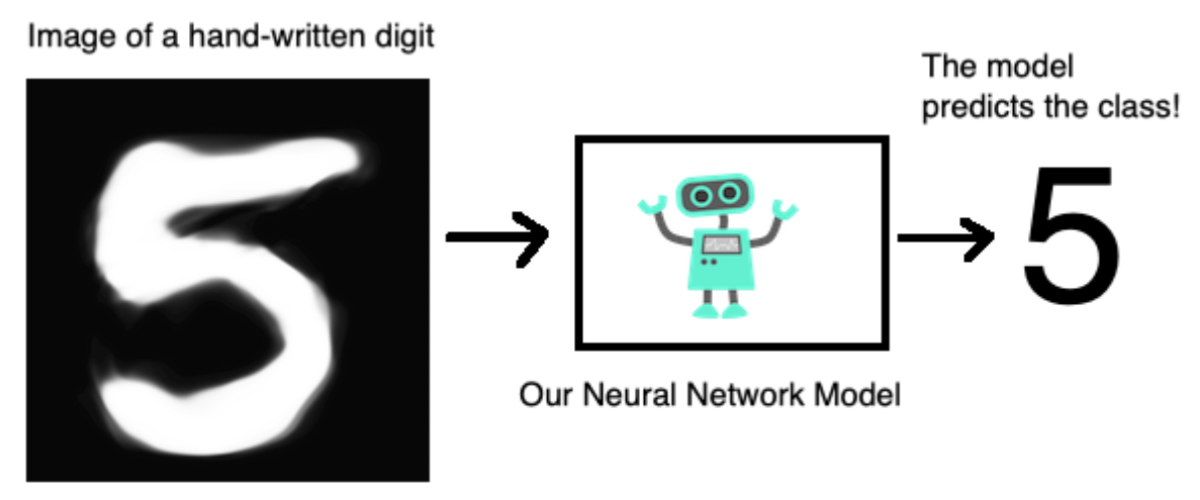

In the illustration:
- The left image shows a handwritten “5.”
- The middle box represents our neural network, which takes pixel values as input and processes them through multiple layers of neurons.
- The right side shows the predicted class: the model outputs “5”.

In [153]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


## 2. Load the Dataset (MNIST)

In [194]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [195]:
# Load data and shapes of imported arrays
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Raw shapes:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)


Raw shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


The Objective is to get images and labels into memory.

The MNIST dataset gives us 70,000 grayscale images of handwritten digits (0–9). Each image is a 28×28 matrix of pixel intensity values between 0 and 255:
- X_train is the image data ( array of pixel intensities: 60,000 training images, each of size 28×28 pixels.
- y_train is the correct digit labels for each image: 60,000 corresponding labels (each one number 0–9).
- X_test: 10,000 test images (28×28 each).
- y_test: 10,000 corresponding test labels.

## 3. Preprocess images 

- Flatten each 28×28 image → 784 features.
- Normalize once (min–max): divide by 255 so pixels lie in [0,1].
- Example check showed Scaled min/max: 0.0 1.0.

In [196]:
# Normalize and flatten

X_train_flat = X_train.reshape(len(X_train), -1).astype("float32") / 255.0
X_test_flat  = X_test.reshape(len(X_test), -1).astype("float32") / 255.0

print("Scaled min/max:", X_train_flat.min(), X_train_flat.max())  # 0.0 1.0

Scaled min/max: 0.0 1.0


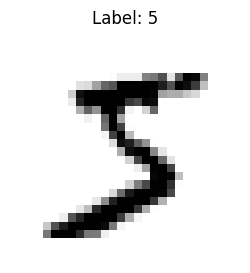

In [197]:
# Visual check
idx = 0
plt.figure(figsize=(3,3))
plt.imshow(X_train[idx], cmap="binary")
plt.title(f"Label: {y_train[idx]}")
plt.axis("off"); plt.show()

## 4. One-hot encode labels

The objective is to convert integer labels (e.g., 5) to 10-D vectors (e.g., [0,0,0,0,0,1,0,0,0,0]) using to_categorical.

- Neural networks output a vector of probabilities over 10 digits. It is thus trained with **categorical cross-entropy**.  

- One-hot encoding lets the loss function compare the predicted probability vector with the true vector.Without this step, the model couldn’t learn properly from categorical data.

- After encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

- Each vector has 10 positions (for digits 0 → 9), and exactly one element = 1 indicates the correct class.

- Without encoding, the model would treat “5” as a continuous number rather than a category.

In [198]:
# One-hot encode labels for categorical_crossentropy
num_classes = 10
y_train_oh = to_categorical(y_train, num_classes)
y_test_oh  = to_categorical(y_test,  num_classes)

print("One-hot shapes:", y_train_oh.shape, y_test_oh.shape)  

One-hot shapes: (60000, 10) (10000, 10)


- Each integer labels (0 - 9) is converted into binary vectors (a one-hot vector) so that your neural network can use categorical cross-entropy to learn which digit each image represents.

- There are 10 possible digits.

In [199]:
# Test first encoded labels (first 3)
y_train[:3], y_train_oh[:3]

(array([5, 0, 4], dtype=uint8),
 array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))

## 4. Neural-network refresher (math)

Each dense layer computes Z = W·X + b, then applies an activation A = g(Z) 
- ReLU for hidden layers; 
- Softmax for output).


## 6. Build the Neural Network

In [200]:
# Build the model 
model = Sequential([
    Dense(256, activation='relu', kernel_initializer='he_normal', input_shape=(784,)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 256)               200960    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We’re building a Sequential model which means layers are stacked one after another in a straight line. The Dense layers learn combinations of pixel features while the Dropout reduces overfitting.

- In the input layer, each MNIST image is flattened into 784 features (28×28). So this layer expects input vectors of shape (784,) per sample. Note that no neurons are learned here, it just defines input size.

- In the first hidden layer, each neuron connects to all 784 inputs.

Activation: ReLU (f(x) = max(0, x)) introduces nonlinearity and helps model complex patterns.
Parameters = (784 inputs × 256 neurons) + 256 bias terms = 200,960

- In the second hidden layer, stacking layers helps the model learn hierarchical features.
Parameters = 128 × 256 + 128 = 32,896

- In the output layer, the neuron with the highest probability is the model’s prediction. There are 10 neurons, one for each digit class (0–9). Softmax converts the raw outputs into probabilities that sum to 1.
Parameters = 128 × 10 + 10 = 1,290

Total Parameters = 200,960 + 32,896 + 1,290 = 235,146

All of them are trainable which means the model will adjust these weights and biases during training. 



## 7. Compile the Model

We are going to choose Adaptive Moment Estimation (adam) one of the most popular and powerful optimizers in deep learning. 

The loss function measures how far your predicted probabilities are from the true labels.

The metrics=["accuracy"] tells TensorFlow to track the accuracy metric during training and evaluation.

In [201]:
# Compile with a conservative Adam
model.compile(
    optimizer=Adam(learning_rate=3e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [202]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 256)               200960    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 8. Train the Model

In [203]:
# Train the model with validation & callbacks
callbacks = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-5, verbose=1),
    EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True, verbose=1),
]

history = model.fit(
    X_train_flat, y_train_oh,
    validation_split=0.1,
    epochs=20,          # <-- was 3
    batch_size=128,
    shuffle=True,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/20


2025-10-16 12:08:03.985531: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


422/422 - 3s - loss: 0.6612 - accuracy: 0.7903 - val_loss: 0.2734 - val_accuracy: 0.9225 - lr: 3.0000e-04 - 3s/epoch - 7ms/step
Epoch 2/20
422/422 - 3s - loss: 0.4332 - accuracy: 0.8760 - val_loss: 0.2500 - val_accuracy: 0.9275 - lr: 3.0000e-04 - 3s/epoch - 6ms/step
Epoch 3/20
422/422 - 3s - loss: 0.5164 - accuracy: 0.8658 - val_loss: 0.2677 - val_accuracy: 0.9280 - lr: 3.0000e-04 - 3s/epoch - 6ms/step
Epoch 4/20

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
422/422 - 3s - loss: 0.6803 - accuracy: 0.8506 - val_loss: 0.3218 - val_accuracy: 0.9272 - lr: 3.0000e-04 - 3s/epoch - 6ms/step
Epoch 5/20
422/422 - 3s - loss: 0.8442 - accuracy: 0.8386 - val_loss: 0.3358 - val_accuracy: 0.9280 - lr: 1.5000e-04 - 3s/epoch - 6ms/step
Epoch 6/20

Epoch 6: ReduceLROnPlateau reducing learning rate to 7.500000356230885e-05.
Restoring model weights from the end of the best epoch: 2.
422/422 - 3s - loss: 0.9784 - accuracy: 0.8334 - val_loss: 0.3711 - val_accuracy: 0.9283 - l

## 9. Evaluate the Model

In [204]:
# 9) Evaluate 
test_loss, test_acc = model.evaluate(X_test_flat, y_test_oh)
print(f"Test accuracy: {test_acc*100:.2f}% | Test loss: {test_loss:.4f}")

313/313 [==============================] - 2s 6ms/step - loss: 0.2969 - accuracy: 0.9177
Test accuracy: 91.77% | Test loss: 0.2969


## 10. Make Predictions on Test Set and Visualize

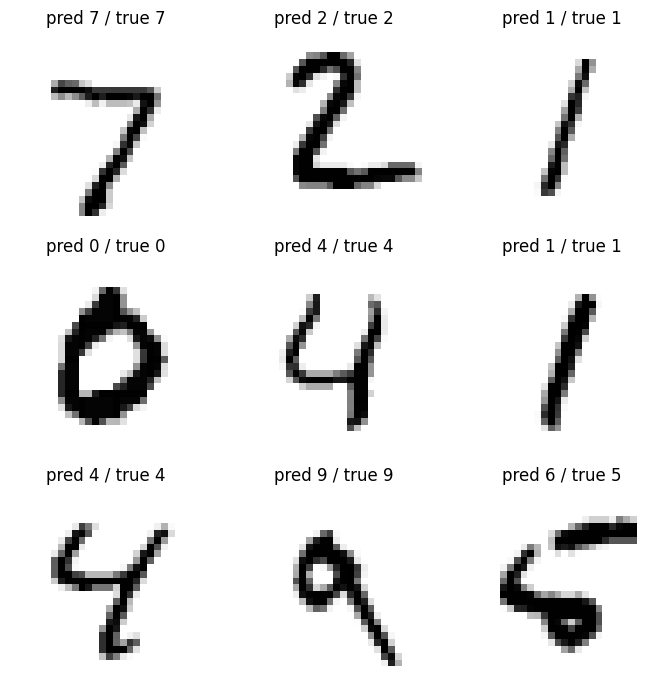

In [205]:
probs = model.predict(X_test_flat, verbose=0)
y_pred = probs.argmax(axis=1)

# show a few predictions
n = 9
plt.figure(figsize=(7,7))
for i in range(n):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(X_test[i], cmap="binary")
    plt.title(f"pred {y_pred[i]} / true {y_test[i]}")
    plt.axis("off")
plt.tight_layout(); plt.show()

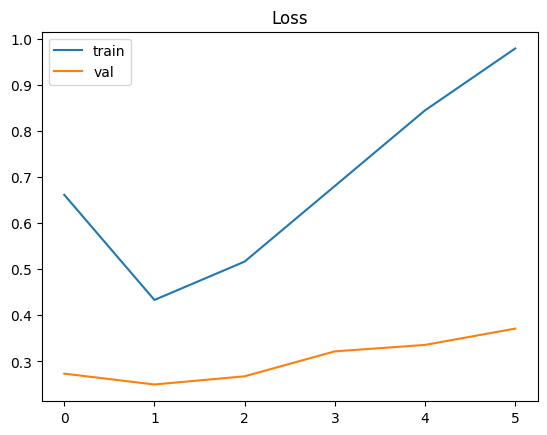

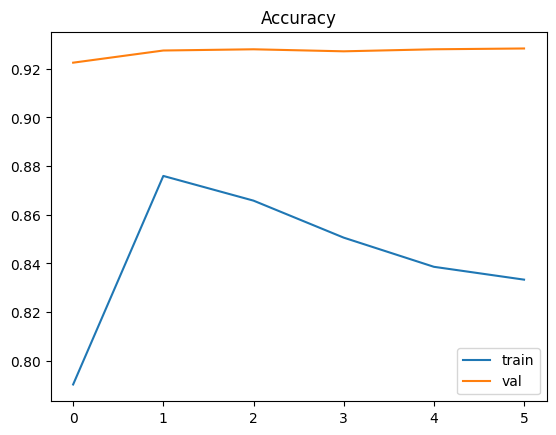

In [206]:
plt.figure(); plt.plot(history.history["loss"], label="train"); plt.plot(history.history["val_loss"], label="val")
plt.title("Loss"); plt.legend(); plt.show()

plt.figure(); plt.plot(history.history["accuracy"], label="train"); plt.plot(history.history["val_accuracy"], label="val")
plt.title("Accuracy"); plt.legend(); plt.show()

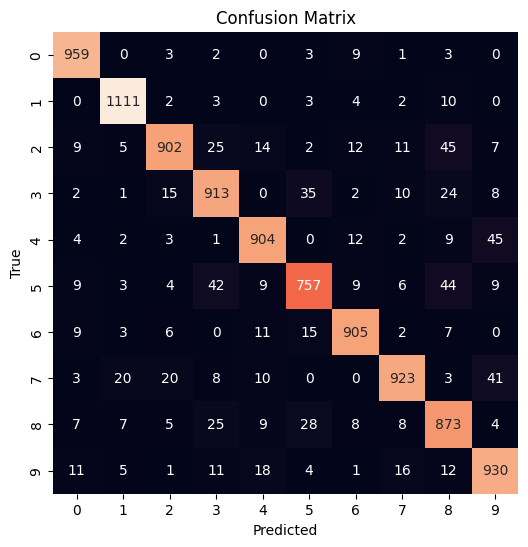

              precision    recall  f1-score   support

           0      0.947     0.979     0.962       980
           1      0.960     0.979     0.969      1135
           2      0.939     0.874     0.905      1032
           3      0.886     0.904     0.895      1010
           4      0.927     0.921     0.924       982
           5      0.894     0.849     0.871       892
           6      0.941     0.945     0.943       958
           7      0.941     0.898     0.919      1028
           8      0.848     0.896     0.871       974
           9      0.891     0.922     0.906      1009

    accuracy                          0.918     10000
   macro avg      0.917     0.917     0.917     10000
weighted avg      0.918     0.918     0.918     10000



In [207]:
# Confusion matrix & classification report

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns  

y_pred = model.predict(X_test_flat, verbose=0).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix"); plt.show()

print(classification_report(y_test, y_pred, digits=3))